In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [2]:
el = pd.read_csv('eligible.txt', delimiter='|', names=['slot','block_number'])
el.head()

,slot,block_number
0,6043994,16871910
1,6043988,16871904
2,6043998,16871914
3,6044000,16871916
4,6044002,16871918


In [3]:
len(el), len(el)/7200

(4230, 0.5875)

In [ ]:
payload = "\'["
for i in el['block_number'].values[4000:]:
    template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
    payload += "{"
    payload += template
    payload += "},"
payload=payload[:-1]
payload += "]\'"

In [ ]:
url = 'curl https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZBz -X POST -H "Content-Type: application/json" -s -d'
req = "{} {}".format(url, payload)

In [ ]:
print(req, end='')
print('| jq -jr \'.[] | .result["number"], " ", .result["hash"], "\\n"\' > 4.txt')

In [4]:
seen = pd.read_csv('seen.txt', delimiter='|', names=['slot','block_hash','builder_pubkey','received_at','eligible_at'])
seen['received_at'] = pd.to_datetime(seen['received_at'], format="%Y-%m-%d%H:%M:%S.%f", errors = 'coerce')
seen['eligible_at'] = pd.to_datetime(seen['eligible_at'], format="%Y-%m-%d%H:%M:%S.%f", errors = 'coerce')
seen.head()

,slot,block_hash,builder_pubkey,received_at,eligible_at
0,16871904,0x1445938da29fcecc6f5e2d08511531cedca70079973d...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,2023-03-20 22:37:58.620013,2023-03-20 22:37:58.914306
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626
3,16871916,0xd50312a2137a7c210a69b6a48c8d94f3c516c65538ea...,0xa971c4ee4ac5d47e0fb9e16be05981bfe51458f14c06...,2023-03-20 22:40:23.338373,2023-03-20 22:40:23.416462
4,16871918,0xf41e4339b5bde7b244fafe1014471a1f1005064131ae...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:40:46.543002,2023-03-20 22:40:46.955778


In [5]:
builders = pd.read_csv('builders.txt', delimiter="|", names=['builder_pubkey'])
builders['optimistic'] = 't'
builders.head()

,builder_pubkey,optimistic
0,0xb066a09b52c583db4c8bb1eba3c629f20b96d6f9a355...,t
1,0x8dde59a0d40b9a77b901fc40bee1116acf643b2b6065...,t
2,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,t
3,0xaec4ec48c2ec03c418c599622980184e926f0de3c9ce...,t
4,0x96a59d355b1f65e270b29981dd113625732539e955a1...,t


In [6]:
seen_bld = seen.merge(builders, on='builder_pubkey', how='left')
seen_bld.head()

,slot,block_hash,builder_pubkey,received_at,eligible_at,optimistic
0,16871904,0x1445938da29fcecc6f5e2d08511531cedca70079973d...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,2023-03-20 22:37:58.620013,2023-03-20 22:37:58.914306,NaN
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t
3,16871916,0xd50312a2137a7c210a69b6a48c8d94f3c516c65538ea...,0xa971c4ee4ac5d47e0fb9e16be05981bfe51458f14c06...,2023-03-20 22:40:23.338373,2023-03-20 22:40:23.416462,t
4,16871918,0xf41e4339b5bde7b244fafe1014471a1f1005064131ae...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:40:46.543002,2023-03-20 22:40:46.955778,NaN


In [7]:
len(seen_bld), len(seen_bld[seen_bld['builder_pubkey'].isnull()])

(4230, 544)

In [8]:
(4230-544),(4230-544)/4230

(3686, 0.8713947990543736)

In [9]:
relayed = pd.read_csv('relayed.txt', delimiter="|", names=['slot','block_hash'])
relayed['relayed'] = 't'
relayed.head()

,slot,block_hash,relayed
0,6043988,0x1445938da29fcecc6f5e2d08511531cedca70079973d...,t
1,6044000,0xd50312a2137a7c210a69b6a48c8d94f3c516c65538ea...,t
2,6044002,0xf41e4339b5bde7b244fafe1014471a1f1005064131ae...,t
3,6044006,0x9e408ab3305fcbd834c8bc0ac29498632f98f64b29d2...,t
4,6044007,0x1b8ae200a35cbcd6fffac0f2d3b4eac4bb1c22f01465...,t


In [10]:
seen_relayed = seen_bld.merge(relayed, on='block_hash', how='left')
seen_relayed.head()

,slot_x,block_hash,builder_pubkey,received_at,eligible_at,optimistic,slot_y,relayed
0,16871904,0x1445938da29fcecc6f5e2d08511531cedca70079973d...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,2023-03-20 22:37:58.620013,2023-03-20 22:37:58.914306,NaN,6043988.0,t
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,NaN,NaN
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,NaN,NaN
3,16871916,0xd50312a2137a7c210a69b6a48c8d94f3c516c65538ea...,0xa971c4ee4ac5d47e0fb9e16be05981bfe51458f14c06...,2023-03-20 22:40:23.338373,2023-03-20 22:40:23.416462,t,6044000.0,t
4,16871918,0xf41e4339b5bde7b244fafe1014471a1f1005064131ae...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:40:46.543002,2023-03-20 22:40:46.955778,NaN,6044002.0,t


In [11]:
seen_relayed_nn = seen_relayed[seen_relayed['builder_pubkey'].notna()]
seen_relayed_nn

,slot_x,block_hash,builder_pubkey,received_at,eligible_at,optimistic,slot_y,relayed
0,16871904,0x1445938da29fcecc6f5e2d08511531cedca70079973d...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,2023-03-20 22:37:58.620013,2023-03-20 22:37:58.914306,NaN,6043988.0,t
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,NaN,NaN
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,NaN,NaN
3,16871916,0xd50312a2137a7c210a69b6a48c8d94f3c516c65538ea...,0xa971c4ee4ac5d47e0fb9e16be05981bfe51458f14c06...,2023-03-20 22:40:23.338373,2023-03-20 22:40:23.416462,t,6044000.0,t
4,16871918,0xf41e4339b5bde7b244fafe1014471a1f1005064131ae...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:40:46.543002,2023-03-20 22:40:46.955778,NaN,6044002.0,t
...,...,...,...,...,...,...,...,...
4225,16879018,0x4e094bb4cda8ed9b24e7dccf0100f75de445d0fdd848...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-21 22:37:11.232860,2023-03-21 22:37:11.261067,t,6051184.0,t
4226,16879019,0xe85ba81eae693128a60b542f6a801796c8f380afe515...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-21 22:37:23.234242,2023-03-21 22:37:23.378112,t,NaN,NaN
4227,16879020,0xc2fc0e3120f302eb8df33523fbe2fb311d8fb9b6e313...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,2023-03-21 22:37:35.711665,2023-03-21 22:37:35.730443,t,NaN,NaN
4228,16879021,0x861436af52620088f1c2dac5f05f69574965c4ab43ab...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,2023-03-21 22:37:47.079153,2023-03-21 22:37:48.006876,t,NaN,NaN


In [12]:
len(seen_relayed_nn[seen_relayed_nn['relayed'].notna()]), len(seen_relayed_nn[seen_relayed_nn['relayed'].isna()]) 

(2002, 1684)

In [ ]:
# 2002     relayed blocks in the 24 hours
# 1684 not-relayed blocks in the 24

In [217]:
2002/3686, 1684/3686

(0.5431361909929463, 0.4568638090070537)

In [13]:
np.count_nonzero(seen_relayed_nn[seen_relayed_nn['eligible_at'].isna()].relayed.values != 't')

74

In [18]:
seen_relayed_nn[seen_relayed_nn['eligible_at'].isna()]['builder_pubkey'].value_counts()

0x83d3495a2951065cf19c4d282afca0a635a39f6504bd76282ed0138fe28680ec60fa3fd149e6d27a94a7d90e7b1fb640    25
0x945fc51bf63613257792926c9155d7ae32db73155dc13bdfe61cd476f1fd2297b66601e8721b723cef11e4e6682e9d87     9
0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4d86ea463d712af1dc80131d0c650dc29ba29ef27c881f43bd587     8
0xb5d883565500910f3f10f0a2e3a031139d972117a3b67da191ff93ba00ba26502d9b65385b5bca5e7c587273e40f2319     7
0x96a59d355b1f65e270b29981dd113625732539e955a1beeecbc471dd0196c4804574ff871d47ed34ff6d921061e9fc27     5
0x8bc8d110f8b5207e7edc407e8fa033937ddfe8d2c6f18c12a6171400eb6e04d49238ba2b0a95e633d15558e6a706fbe4     4
0x81beef03aafd3dd33ffd7deb337407142c80fea2690e5b3190cfc01bde5753f28982a7857c96172a75a234cb7bcb994f     3
0xb194b2b8ec91a71c18f8483825234679299d146495a08db3bf3fb955e1d85a5fca77e88de93a74f4e32320fc922d3027     3
0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39e81eb91da94af29eaa50f1468813c86503bf41b4b51bf772800e     3
0xa1dead01e65f0a0eee7b5170223f20c8f0cbf122eac3324d61afb

In [19]:
25+9+8

42

In [178]:
# 74 blocks where we never marked the winning bid as eligible.

In [180]:
seen_not_relayed = seen_relayed_nn[seen_relayed_nn['eligible_at'].notna()]
seen_not_relayed = seen_not_relayed[seen_not_relayed['relayed'].isna()]
seen_not_relayed

,slot_x,block_hash,builder_pubkey,received_at,eligible_at,optimistic,slot_y,relayed
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,NaN,NaN
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,NaN,NaN
6,16871920,0x152f6d281058cd2c959639c62c7ce61110cf3186d20f...,0x8b8edce58fafe098763e4fabdeb318d347f9238845f2...,2023-03-20 22:41:11.139076,2023-03-20 22:41:12.440683,NaN,NaN,NaN
12,16871930,0x6b74e0664669f3d274455e403ca6b88b59d7f7ed72fb...,0xb194b2b8ec91a71c18f8483825234679299d146495a0...,2023-03-20 22:43:11.404505,2023-03-20 22:43:11.435239,t,NaN,NaN
13,16871932,0xa8efda74a42966933427a63ae915f00f05c931a45414...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:43:34.875975,2023-03-20 22:43:35.703212,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4218,16879007,0xf9487801495a1eda65e44b647e0d0cc6c920ef1b732b...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-21 22:34:58.036606,2023-03-21 22:34:58.137933,t,NaN,NaN
4220,16879009,0xc6f22051acf0072454e1c2eca2ff6f96ac34cf998627...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-21 22:35:23.103121,2023-03-21 22:35:23.849945,t,NaN,NaN
4226,16879019,0xe85ba81eae693128a60b542f6a801796c8f380afe515...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-21 22:37:23.234242,2023-03-21 22:37:23.378112,t,NaN,NaN
4227,16879020,0xc2fc0e3120f302eb8df33523fbe2fb311d8fb9b6e313...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,2023-03-21 22:37:35.711665,2023-03-21 22:37:35.730443,t,NaN,NaN


In [182]:
seen_not_relayed_nopt = seen_not_relayed[seen_not_relayed['optimistic'].isna()]
set(seen_not_relayed_nopt.builder_pubkey), len(seen_not_relayed_nopt)

({'0x80c7311597316f871363f8395b6a8d056071d90d8eb27defd14759e8522786061b13728623452740ba05055f5ba9d3d5',
  '0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a3f44d4575a231c7bd9c31d10b6328ef68ed1e8c02a3dbc8e80f9',
  '0x81beef03aafd3dd33ffd7deb337407142c80fea2690e5b3190cfc01bde5753f28982a7857c96172a75a234cb7bcb994f',
  '0x89551cb5def7a710d58c3f3c0b234266df9cab138d6bd79e58b03c3681030751f1aab2e2b08a706e2aba6db23ee1fb8b',
  '0x8b8edce58fafe098763e4fabdeb318d347f9238845f22c507e813186ea7d44adecd3028f9288048f9ad3bc7c7c735fba',
  '0x8ed74896fb129ac7f48d6a2908400044103b65d5c4e8f63feafd849f90fc174a4b71206a51b9453c12292bab3a92a4a2',
  '0x94aa4ee318f39b56547a253700917982f4b737a49fc3f99ce08fa715e488e673d88a60f7d2cf9145a05127f17dcb7c67',
  '0x965a05a1ba338f4bbbb97407d70659f4cea2146d83ac5da6c2f3de824713c927dcba706f35322d65764912e7756103e2',
  '0x976e63c505050e25b70b39238990c78ddf0948685eb8c5687d17ba5089541f37dd3c45999f2db449eac298b1d4856013',
  '0xa1dead01e65f0a0eee7b5170223f20c8f0cbf122eac3324d61afbdb33a8

In [219]:
467/1610

0.29006211180124225

In [209]:
all_builders = pd.read_csv('allbuilders.txt', delimiter='|', names=['builder_pubkey', 'description'])
seen_not_relayed_nopt_desc = seen_not_relayed_nopt.merge(all_builders, on='builder_pubkey', how='left')
seen_not_relayed_nopt_desc[['description']].value_counts()

description
flashbots      388
bloxroute       68
payload          4
0x69             4
eth-builder      3
dtype: int64

In [188]:
seen_not_relayed_opt = seen_not_relayed[seen_not_relayed['optimistic'].notna()]
len(seen_not_relayed_opt)

1143

In [189]:
seen_not_relayed_opt.head()

,slot_x,block_hash,builder_pubkey,received_at,eligible_at,optimistic,slot_y,relayed
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,NaN,NaN
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,NaN,NaN
12,16871930,0x6b74e0664669f3d274455e403ca6b88b59d7f7ed72fb...,0xb194b2b8ec91a71c18f8483825234679299d146495a0...,2023-03-20 22:43:11.404505,2023-03-20 22:43:11.435239,t,NaN,NaN
16,16871935,0x4f2343fb49205c75b3673f8e4ba3f7fbfcf3f3ef0fa0...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-20 22:44:11.114526,2023-03-20 22:44:11.151341,t,NaN,NaN
17,16871936,0xf8374b63942074ccbb0f67cdeac690f167ad74ec81c5...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-20 22:44:23.225864,2023-03-20 22:44:23.452943,t,NaN,NaN


In [190]:
seen_not_relayed_opt['slot_boundary'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in seen_not_relayed_opt['received_at'].values])
seen_not_relayed_opt.head()

<ipython-input-190-66b840e58df0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seen_not_relayed_opt['slot_boundary'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in seen_not_relayed_opt['received_at'].values])


,slot_x,block_hash,builder_pubkey,received_at,eligible_at,optimistic,slot_y,relayed,slot_boundary
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,NaN,NaN,2023-03-20 22:39:12
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,NaN,NaN,2023-03-20 22:40:00
12,16871930,0x6b74e0664669f3d274455e403ca6b88b59d7f7ed72fb...,0xb194b2b8ec91a71c18f8483825234679299d146495a0...,2023-03-20 22:43:11.404505,2023-03-20 22:43:11.435239,t,NaN,NaN,2023-03-20 22:43:12
16,16871935,0x4f2343fb49205c75b3673f8e4ba3f7fbfcf3f3ef0fa0...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-20 22:44:11.114526,2023-03-20 22:44:11.151341,t,NaN,NaN,2023-03-20 22:44:12
17,16871936,0xf8374b63942074ccbb0f67cdeac690f167ad74ec81c5...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-20 22:44:23.225864,2023-03-20 22:44:23.452943,t,NaN,NaN,2023-03-20 22:44:24


In [192]:
seen_not_relayed_opt['diff'] = [v.total_seconds() for v in seen_not_relayed_opt['slot_boundary'] - seen_not_relayed_opt['eligible_at']]

<ipython-input-192-6296413597ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seen_not_relayed_opt['diff'] = [v.total_seconds() for v in seen_not_relayed_opt['slot_boundary'] - seen_not_relayed_opt['eligible_at']]


In [195]:
seen_not_relayed_opt['diff']

1       0.010038
2       0.750374
12      0.564761
16      0.848659
17      0.547057
          ...   
4218    1.862067
4220    0.150055
4226    0.621888
4227    0.269557
4228   -0.006876
Name: diff, Length: 1143, dtype: float64

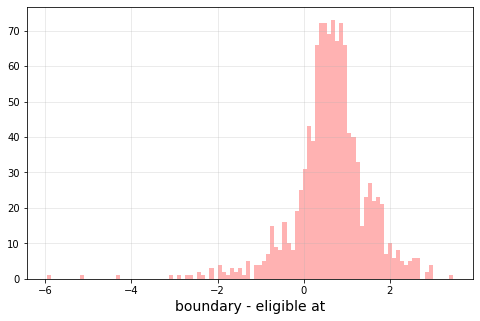

In [210]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(seen_not_relayed_opt['diff'], bins=100, color='red', alpha=0.3)
ax.set_xlabel('boundary - eligible at', size=14)
plt.show()

In [230]:
np.percentile(seen_not_relayed_opt['diff'].values, 50), seen_not_relayed_opt['diff'].values.mean()

(0.656855, 0.6352542292213473)

In [201]:
len(seen_not_relayed_opt[seen_not_relayed_opt['diff']>0]), len(seen_not_relayed_opt[seen_not_relayed_opt['diff']<-0])

(965, 178)

In [220]:
965/1143

0.8442694663167104

In [213]:
snr = seen_not_relayed_opt[seen_not_relayed_opt['received_at'] < seen_not_relayed_opt['slot_boundary']
snr = snr[snr['slot_boundary'] < snr['eligible_at']]
snr.head()

,slot_x,block_hash,builder_pubkey,received_at,eligible_at,optimistic,slot_y,relayed,slot_boundary,diff
23,16871946,0x1aebd10d7676bb43579a2856d2d89a0f58cc31b6e6b0...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-20 22:46:23.687108,2023-03-20 22:46:25.257527,t,NaN,NaN,2023-03-20 22:46:24,-1.257527
67,16872009,0x09411e91adfbe339bacd1b1c52a49b23fe7236fa9993...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-20 22:58:59.489507,2023-03-20 22:59:00.401482,t,NaN,NaN,2023-03-20 22:59:00,-0.401482
90,16872044,0x626e4d1c7527d8a433b01bf32b4b024b7e0885bf296d...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-20 23:05:59.238486,2023-03-20 23:06:00.740722,t,NaN,NaN,2023-03-20 23:06:00,-0.740722
223,16872255,0x0bc4f97e24ab87e1c645326cac47efd8604937e062d4...,0xa4fb63c2ceeee73d1f1711fadf1c5357ac98cecb999d...,2023-03-20 23:48:34.996172,2023-03-20 23:48:36.000708,t,NaN,NaN,2023-03-20 23:48:36,-0.000708
245,16872295,0x5ef6248300bbe1a12bddfe72a01b8d4bb15111e395e2...,0xa31892c0466813868f0cd8d3255dab5f84ae1a6d4a28...,2023-03-20 23:56:35.227067,2023-03-20 23:56:36.073640,t,NaN,NaN,2023-03-20 23:56:36,-0.073640


In [221]:
len(snr), 143/178

(143, 0.8033707865168539)

In [203]:
seen_not_relayed_opt[['eligible_at', 'slot_boundary']]

,eligible_at,slot_boundary
1,2023-03-20 22:39:11.989962,2023-03-20 22:39:12
2,2023-03-20 22:39:59.249626,2023-03-20 22:40:00
12,2023-03-20 22:43:11.435239,2023-03-20 22:43:12
16,2023-03-20 22:44:11.151341,2023-03-20 22:44:12
17,2023-03-20 22:44:23.452943,2023-03-20 22:44:24
...,...,...
4218,2023-03-21 22:34:58.137933,2023-03-21 22:35:00
4220,2023-03-21 22:35:23.849945,2023-03-21 22:35:24
4226,2023-03-21 22:37:23.378112,2023-03-21 22:37:24
4227,2023-03-21 22:37:35.730443,2023-03-21 22:37:36


In [224]:
len(seen_not_relayed_opt[seen_not_relayed_opt['received_at'] > seen_not_relayed_opt['slot_boundary']])

35

In [231]:
seen_not_relayed_opt

,slot_x,block_hash,builder_pubkey,received_at,eligible_at,optimistic,slot_y,relayed,slot_boundary,diff
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,NaN,NaN,2023-03-20 22:39:12,0.010038
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,NaN,NaN,2023-03-20 22:40:00,0.750374
12,16871930,0x6b74e0664669f3d274455e403ca6b88b59d7f7ed72fb...,0xb194b2b8ec91a71c18f8483825234679299d146495a0...,2023-03-20 22:43:11.404505,2023-03-20 22:43:11.435239,t,NaN,NaN,2023-03-20 22:43:12,0.564761
16,16871935,0x4f2343fb49205c75b3673f8e4ba3f7fbfcf3f3ef0fa0...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-20 22:44:11.114526,2023-03-20 22:44:11.151341,t,NaN,NaN,2023-03-20 22:44:12,0.848659
17,16871936,0xf8374b63942074ccbb0f67cdeac690f167ad74ec81c5...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-20 22:44:23.225864,2023-03-20 22:44:23.452943,t,NaN,NaN,2023-03-20 22:44:24,0.547057
...,...,...,...,...,...,...,...,...,...,...
4218,16879007,0xf9487801495a1eda65e44b647e0d0cc6c920ef1b732b...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-21 22:34:58.036606,2023-03-21 22:34:58.137933,t,NaN,NaN,2023-03-21 22:35:00,1.862067
4220,16879009,0xc6f22051acf0072454e1c2eca2ff6f96ac34cf998627...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-21 22:35:23.103121,2023-03-21 22:35:23.849945,t,NaN,NaN,2023-03-21 22:35:24,0.150055
4226,16879019,0xe85ba81eae693128a60b542f6a801796c8f380afe515...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-21 22:37:23.234242,2023-03-21 22:37:23.378112,t,NaN,NaN,2023-03-21 22:37:24,0.621888
4227,16879020,0xc2fc0e3120f302eb8df33523fbe2fb311d8fb9b6e313...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,2023-03-21 22:37:35.711665,2023-03-21 22:37:35.730443,t,NaN,NaN,2023-03-21 22:37:36,0.269557


## with durations 

In [234]:
seen_dur = pd.read_csv('seen_duration.txt', delimiter='|', names=['block','block_hash','builder_pubkey','received_at','eligible_at','is_optimistic','total_duration'])
seen_dur['received_at'] = pd.to_datetime(seen_dur['received_at'], format="%Y-%m-%d%H:%M:%S.%f", errors = 'coerce')
seen_dur['eligible_at'] = pd.to_datetime(seen_dur['eligible_at'], format="%Y-%m-%d%H:%M:%S.%f", errors = 'coerce')
seen_dur.head()

,block,block_hash,builder_pubkey,received_at,eligible_at,is_optimistic,total_duration
0,16871904,0x1445938da29fcecc6f5e2d08511531cedca70079973d...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,2023-03-20 22:37:58.620013,2023-03-20 22:37:58.914306,f,294292.0
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,23950.0
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,175801.0
3,16871916,0xd50312a2137a7c210a69b6a48c8d94f3c516c65538ea...,0xa971c4ee4ac5d47e0fb9e16be05981bfe51458f14c06...,2023-03-20 22:40:23.338373,2023-03-20 22:40:23.416462,t,78088.0
4,16871918,0xf41e4339b5bde7b244fafe1014471a1f1005064131ae...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:40:46.543002,2023-03-20 22:40:46.955778,f,412775.0


In [235]:
seen_dur_relayed = seen_dur.merge(relayed, on='block_hash', how='left')
seen_dur_relayed.head()

,block,block_hash,builder_pubkey,received_at,eligible_at,is_optimistic,total_duration,slot,relayed
0,16871904,0x1445938da29fcecc6f5e2d08511531cedca70079973d...,0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a...,2023-03-20 22:37:58.620013,2023-03-20 22:37:58.914306,f,294292.0,6043988.0,t
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,23950.0,NaN,NaN
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,175801.0,NaN,NaN
3,16871916,0xd50312a2137a7c210a69b6a48c8d94f3c516c65538ea...,0xa971c4ee4ac5d47e0fb9e16be05981bfe51458f14c06...,2023-03-20 22:40:23.338373,2023-03-20 22:40:23.416462,t,78088.0,6044000.0,t
4,16871918,0xf41e4339b5bde7b244fafe1014471a1f1005064131ae...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:40:46.543002,2023-03-20 22:40:46.955778,f,412775.0,6044002.0,t


In [236]:
len(seen_dur_relayed)

4230

In [237]:
seen_dur_relayed_nn = seen_dur_relayed[seen_dur_relayed['builder_pubkey'].notna()]
len(seen_dur_relayed_nn)

3686

In [239]:
len(seen_dur_relayed_nn[seen_relayed_nn['relayed'].notna()]), len(seen_dur_relayed_nn[seen_relayed_nn['relayed'].isna()]) 

(2002, 1684)

In [ ]:
# 2002     relayed blocks in the 24 hours
# 1684 not-relayed blocks in the 24

In [217]:
2002/3686, 1684/3686

(0.5431361909929463, 0.4568638090070537)

In [241]:
np.count_nonzero(seen_dur_relayed_nn[seen_dur_relayed_nn['eligible_at'].isna()].relayed.values != 't')

74

In [178]:
# 74 blocks where we never marked the winning bid as eligible.

In [243]:
seen_dur_not_relayed = seen_dur_relayed_nn[seen_relayed_nn['eligible_at'].notna()]
seen_dur_not_relayed = seen_dur_not_relayed[seen_dur_not_relayed['relayed'].isna()]
seen_dur_not_relayed

,block,block_hash,builder_pubkey,received_at,eligible_at,is_optimistic,total_duration,slot,relayed
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,23950.0,NaN,NaN
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,175801.0,NaN,NaN
6,16871920,0x152f6d281058cd2c959639c62c7ce61110cf3186d20f...,0x8b8edce58fafe098763e4fabdeb318d347f9238845f2...,2023-03-20 22:41:11.139076,2023-03-20 22:41:12.440683,f,1301606.0,NaN,NaN
12,16871930,0x6b74e0664669f3d274455e403ca6b88b59d7f7ed72fb...,0xb194b2b8ec91a71c18f8483825234679299d146495a0...,2023-03-20 22:43:11.404505,2023-03-20 22:43:11.435239,t,30733.0,NaN,NaN
13,16871932,0xa8efda74a42966933427a63ae915f00f05c931a45414...,0x81beef03aafd3dd33ffd7deb337407142c80fea2690e...,2023-03-20 22:43:34.875975,2023-03-20 22:43:35.703212,f,827236.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4218,16879007,0xf9487801495a1eda65e44b647e0d0cc6c920ef1b732b...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-21 22:34:58.036606,2023-03-21 22:34:58.137933,t,101326.0,NaN,NaN
4220,16879009,0xc6f22051acf0072454e1c2eca2ff6f96ac34cf998627...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-21 22:35:23.103121,2023-03-21 22:35:23.849945,t,746824.0,NaN,NaN
4226,16879019,0xe85ba81eae693128a60b542f6a801796c8f380afe515...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-21 22:37:23.234242,2023-03-21 22:37:23.378112,t,143870.0,NaN,NaN
4227,16879020,0xc2fc0e3120f302eb8df33523fbe2fb311d8fb9b6e313...,0x96a59d355b1f65e270b29981dd113625732539e955a1...,2023-03-21 22:37:35.711665,2023-03-21 22:37:35.730443,t,18778.0,NaN,NaN


In [245]:
seen_not_relayed_nopt = seen_dur_not_relayed[seen_dur_not_relayed['is_optimistic'] == 'f']
set(seen_not_relayed_nopt.builder_pubkey), len(seen_not_relayed_nopt)

({'0x80c7311597316f871363f8395b6a8d056071d90d8eb27defd14759e8522786061b13728623452740ba05055f5ba9d3d5',
  '0x81babeec8c9f2bb9c329fd8a3b176032fe0ab5f3b92a3f44d4575a231c7bd9c31d10b6328ef68ed1e8c02a3dbc8e80f9',
  '0x81beef03aafd3dd33ffd7deb337407142c80fea2690e5b3190cfc01bde5753f28982a7857c96172a75a234cb7bcb994f',
  '0x89551cb5def7a710d58c3f3c0b234266df9cab138d6bd79e58b03c3681030751f1aab2e2b08a706e2aba6db23ee1fb8b',
  '0x8b8edce58fafe098763e4fabdeb318d347f9238845f22c507e813186ea7d44adecd3028f9288048f9ad3bc7c7c735fba',
  '0x8bc8d110f8b5207e7edc407e8fa033937ddfe8d2c6f18c12a6171400eb6e04d49238ba2b0a95e633d15558e6a706fbe4',
  '0x8ed74896fb129ac7f48d6a2908400044103b65d5c4e8f63feafd849f90fc174a4b71206a51b9453c12292bab3a92a4a2',
  '0x945fc51bf63613257792926c9155d7ae32db73155dc13bdfe61cd476f1fd2297b66601e8721b723cef11e4e6682e9d87',
  '0x94aa4ee318f39b56547a253700917982f4b737a49fc3f99ce08fa715e488e673d88a60f7d2cf9145a05127f17dcb7c67',
  '0x965a05a1ba338f4bbbb97407d70659f4cea2146d83ac5da6c2f3de82471

In [219]:
467/1610

0.29006211180124225

In [246]:
all_builders = pd.read_csv('allbuilders.txt', delimiter='|', names=['builder_pubkey', 'description'])
seen_not_relayed_nopt_desc = seen_not_relayed_nopt.merge(all_builders, on='builder_pubkey', how='left')
seen_not_relayed_nopt_desc[['description']].value_counts()

description
flashbots      388
bloxroute       68
beaver          18
0x69            17
manta            5
rsync            4
payload          4
rickastley       3
eth-builder      3
titan            1
dtype: int64

In [249]:
seen_dur_not_relayed_opt = seen_dur_not_relayed[seen_dur_not_relayed['is_optimistic'] == 't']
len(seen_dur_not_relayed_opt)

1099

In [250]:
seen_dur_not_relayed_opt.head()

,block,block_hash,builder_pubkey,received_at,eligible_at,is_optimistic,total_duration,slot,relayed
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,23950.0,NaN,NaN
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,175801.0,NaN,NaN
12,16871930,0x6b74e0664669f3d274455e403ca6b88b59d7f7ed72fb...,0xb194b2b8ec91a71c18f8483825234679299d146495a0...,2023-03-20 22:43:11.404505,2023-03-20 22:43:11.435239,t,30733.0,NaN,NaN
16,16871935,0x4f2343fb49205c75b3673f8e4ba3f7fbfcf3f3ef0fa0...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-20 22:44:11.114526,2023-03-20 22:44:11.151341,t,36815.0,NaN,NaN
17,16871936,0xf8374b63942074ccbb0f67cdeac690f167ad74ec81c5...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-20 22:44:23.225864,2023-03-20 22:44:23.452943,t,227078.0,NaN,NaN


In [251]:
seen_dur_not_relayed_opt['slot_boundary'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in seen_dur_not_relayed_opt['received_at'].values])
seen_dur_not_relayed_opt.head()

<ipython-input-251-a6982dfb64d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seen_dur_not_relayed_opt['slot_boundary'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in seen_dur_not_relayed_opt['received_at'].values])


,block,block_hash,builder_pubkey,received_at,eligible_at,is_optimistic,total_duration,slot,relayed,slot_boundary
1,16871910,0x5f2be5f888663e9e60c24f06ab728cdd01871f5e51e3...,0xb5d883565500910f3f10f0a2e3a031139d972117a3b6...,2023-03-20 22:39:11.966011,2023-03-20 22:39:11.989962,t,23950.0,NaN,NaN,2023-03-20 22:39:12
2,16871914,0x235dae41a768108b682b9158acd2c01472c0ea317ae6...,0x82ba7cadcdfc1b156ba2c48c1c627428ba917858e62c...,2023-03-20 22:39:59.073824,2023-03-20 22:39:59.249626,t,175801.0,NaN,NaN,2023-03-20 22:40:00
12,16871930,0x6b74e0664669f3d274455e403ca6b88b59d7f7ed72fb...,0xb194b2b8ec91a71c18f8483825234679299d146495a0...,2023-03-20 22:43:11.404505,2023-03-20 22:43:11.435239,t,30733.0,NaN,NaN,2023-03-20 22:43:12
16,16871935,0x4f2343fb49205c75b3673f8e4ba3f7fbfcf3f3ef0fa0...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-20 22:44:11.114526,2023-03-20 22:44:11.151341,t,36815.0,NaN,NaN,2023-03-20 22:44:12
17,16871936,0xf8374b63942074ccbb0f67cdeac690f167ad74ec81c5...,0xa0d0dbdf7b5eda08c921dee5da7c78c34c9685db3e39...,2023-03-20 22:44:23.225864,2023-03-20 22:44:23.452943,t,227078.0,NaN,NaN,2023-03-20 22:44:24


In [252]:
seen_dur_not_relayed_opt['diff'] = [v.total_seconds() for v in seen_dur_not_relayed_opt['slot_boundary'] - seen_dur_not_relayed_opt['eligible_at']]

<ipython-input-252-a52f39ce3091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seen_dur_not_relayed_opt['diff'] = [v.total_seconds() for v in seen_dur_not_relayed_opt['slot_boundary'] - seen_dur_not_relayed_opt['eligible_at']]


In [254]:
seen_dur_not_relayed_opt['diff']

1       0.010038
2       0.750374
12      0.564761
16      0.848659
17      0.547057
          ...   
4218    1.862067
4220    0.150055
4226    0.621888
4227    0.269557
4228   -0.006876
Name: diff, Length: 1099, dtype: float64

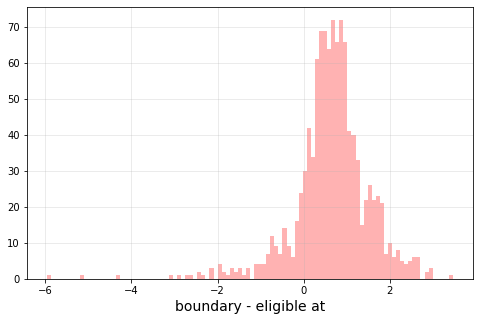

In [255]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(seen_dur_not_relayed_opt['diff'], bins=100, color='red', alpha=0.3)
ax.set_xlabel('boundary - eligible at', size=14)
plt.show()

In [256]:
np.percentile(seen_dur_not_relayed_opt['diff'].values, 50), seen_dur_not_relayed_opt['diff'].values.mean()

(0.684543, 0.6541851637852594)

In [257]:
len(seen_dur_not_relayed_opt[seen_dur_not_relayed_opt['diff']>0]), len(seen_dur_not_relayed_opt[seen_dur_not_relayed_opt['diff']<-0])

(938, 161)

In [259]:
938+161, 938/1099, 161/1099

(1099, 0.8535031847133758, 0.1464968152866242)

In [261]:
snr = seen_dur_not_relayed_opt[seen_dur_not_relayed_opt['received_at'] < seen_dur_not_relayed_opt['slot_boundary']]
snr = snr[snr['slot_boundary'] < snr['eligible_at']]
snr.head()

,block,block_hash,builder_pubkey,received_at,eligible_at,is_optimistic,total_duration,slot,relayed,slot_boundary,diff
23,16871946,0x1aebd10d7676bb43579a2856d2d89a0f58cc31b6e6b0...,0x978a35c39c41aadbe35ea29712bccffb117cc6ebcad4...,2023-03-20 22:46:23.687108,2023-03-20 22:46:25.257527,t,1570419.0,NaN,NaN,2023-03-20 22:46:24,-1.257527
67,16872009,0x09411e91adfbe339bacd1b1c52a49b23fe7236fa9993...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-20 22:58:59.489507,2023-03-20 22:59:00.401482,t,911975.0,NaN,NaN,2023-03-20 22:59:00,-0.401482
90,16872044,0x626e4d1c7527d8a433b01bf32b4b024b7e0885bf296d...,0x83d3495a2951065cf19c4d282afca0a635a39f6504bd...,2023-03-20 23:05:59.238486,2023-03-20 23:06:00.740722,t,1502236.0,NaN,NaN,2023-03-20 23:06:00,-0.740722
223,16872255,0x0bc4f97e24ab87e1c645326cac47efd8604937e062d4...,0xa4fb63c2ceeee73d1f1711fadf1c5357ac98cecb999d...,2023-03-20 23:48:34.996172,2023-03-20 23:48:36.000708,t,1004536.0,NaN,NaN,2023-03-20 23:48:36,-0.000708
245,16872295,0x5ef6248300bbe1a12bddfe72a01b8d4bb15111e395e2...,0xa31892c0466813868f0cd8d3255dab5f84ae1a6d4a28...,2023-03-20 23:56:35.227067,2023-03-20 23:56:36.073640,t,846572.0,NaN,NaN,2023-03-20 23:56:36,-0.073640


In [262]:
len(snr)

128

In [263]:
len(seen_dur_not_relayed_opt)

1099

In [267]:
durs = seen_dur_not_relayed_opt['total_duration'].values
durs = durs[durs < np.percentile(durs,90)]
len(durs)

989

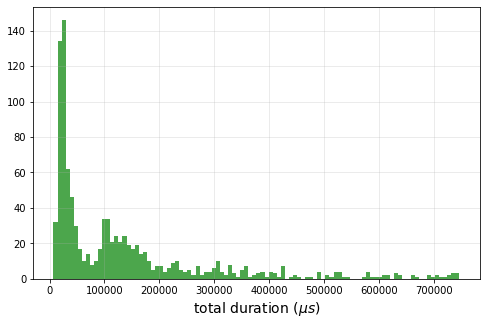

In [269]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(durs, bins=100, color='green', alpha=0.7)
ax.set_xlabel('total duration $(\mu s)$', size=14)
plt.show()

In [271]:
len(durs[durs>70000])

509